In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
#pip install xgboost

In [3]:
#pip install catboost

In [5]:
df=pd.read_csv("/home/yogesh/ml/CoverCast AI/data/raw/insurance2.csv")

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,age,gender,bmi,children,smoker,region,expenses
0,0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,1,18,male,33.8,1,no,southeast,1725.55
2,2,2,28,male,33.0,3,no,southeast,4449.46
3,3,3,33,male,22.7,0,no,northwest,21984.47
4,4,4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,1333,1333,50,male,31.0,3,no,northwest,10600.55
1334,1334,1334,18,female,31.9,0,no,northeast,2205.98
1335,1335,1335,18,female,36.9,0,no,southeast,1629.83
1336,1336,1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
df

,Unnamed: 0.1,Unnamed: 0,age,gender,bmi,children,smoker,region,expenses
0,0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,1,18,male,33.8,1,no,southeast,1725.55
2,2,2,28,male,33.0,3,no,southeast,4449.46
3,3,3,33,male,22.7,0,no,northwest,21984.47
4,4,4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...,...
1333,1333,1333,50,male,31.0,3,no,northwest,10600.55
1334,1334,1334,18,female,31.9,0,no,northeast,2205.98
1335,1335,1335,18,female,36.9,0,no,southeast,1629.83
1336,1336,1336,21,female,25.8,0,no,southwest,2007.95


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])


In [ ]:
df.drop(columns='Unnamed: 0',axis=1, inplace=True)
df.drop(columns='Unnamed: 0.1',axis=1, inplace=True)

In [13]:
df

,age,gender,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


#### Preparing X and Y variables

In [14]:
X = df.drop(columns=['expenses'],axis=1)

In [15]:
y= df.expenses

In [16]:
X.shape

(1338, 6)

In [17]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 6), (268, 6))

#### Create an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6105.4921
- Mean Absolute Error: 4208.5200
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5799.9203
- Mean Absolute Error: 4186.9401
- R2 Score: 0.7833


Lasso
Model performance for Training set
- Root Mean Squared Error: 6105.4931
- Mean Absolute Error: 4208.8932
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5800.2758
- Mean Absolute Error: 4187.6763
- R2 Score: 0.7833


Ridge
Model performance for Training set
- Root Mean Squared Error: 6105.7361
- Mean Absolute Error: 4218.1832
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5803.4133
- Mean Absolute Error: 4198.5312
- R2 Score: 0.7831


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9408.8207
- Mean Absolute Error: 6519.3432


#### Results

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.870395
5,Random Forest Regressor,0.865269
6,XGBRegressor,0.839404
8,AdaBoost Regressor,0.823316
0,Linear Regression,0.783321
1,Lasso,0.783295
2,Ridge,0.783060
4,Decision Tree,0.724959
3,K-Neighbors Regressor,0.148501


In [21]:
cat_model = CatBoostRegressor()
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


Learning rate set to 0.041383
0:	learn: 11663.4218779	total: 1.05ms	remaining: 1.05s
1:	learn: 11323.7246040	total: 2.26ms	remaining: 1.13s
2:	learn: 10990.7204792	total: 2.78ms	remaining: 924ms
3:	learn: 10688.5989344	total: 3.75ms	remaining: 935ms
4:	learn: 10374.1562471	total: 4.67ms	remaining: 928ms
5:	learn: 10074.1367422	total: 5.43ms	remaining: 900ms
6:	learn: 9801.9903778	total: 6.25ms	remaining: 887ms
7:	learn: 9529.5064303	total: 7.04ms	remaining: 873ms
8:	learn: 9275.4544102	total: 7.79ms	remaining: 858ms
9:	learn: 9037.5893211	total: 8.64ms	remaining: 856ms
10:	learn: 8800.9327597	total: 9.09ms	remaining: 817ms
11:	learn: 8573.0502820	total: 9.88ms	remaining: 814ms
12:	learn: 8386.2827837	total: 10.8ms	remaining: 817ms
13:	learn: 8187.1865127	total: 11.2ms	remaining: 790ms
14:	learn: 7989.9466211	total: 12.3ms	remaining: 807ms
15:	learn: 7805.2257238	total: 13.2ms	remaining: 811ms
16:	learn: 7613.9853332	total: 14.1ms	remaining: 814ms
17:	learn: 7442.1048120	total: 15ms	rem

## Plot y_pred and y_test

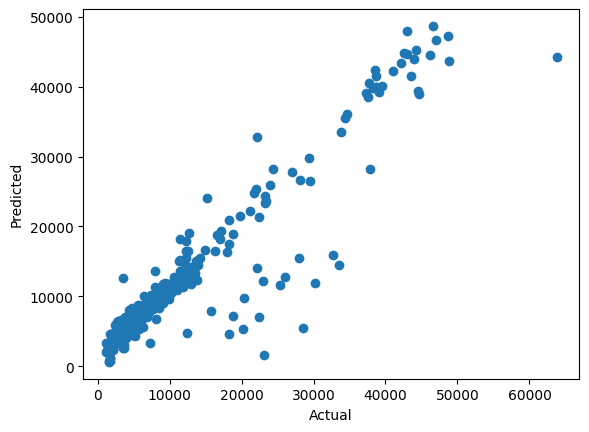

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

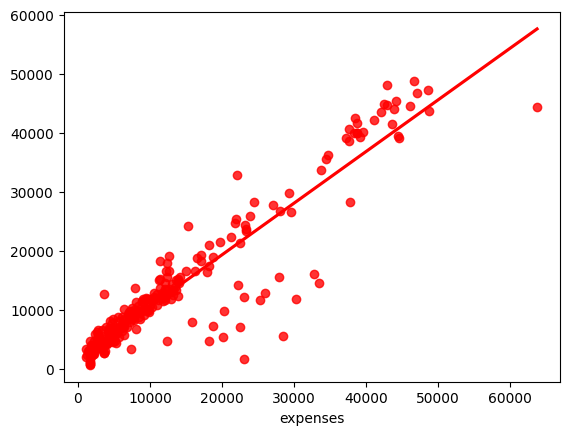

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.07,11722.959530,-2627.889530
887,5272.18,6512.444058,-1240.264058
890,29330.98,29791.443946,-460.463946
1293,9301.89,10137.914246,-836.024246
259,33750.29,33591.277994,159.012006
...,...,...,...
109,47055.53,46659.240802,396.289198
575,12222.90,13246.839110,-1023.939110
535,6067.13,6450.352027,-383.222027
543,63770.43,44321.077163,19449.352837
